In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.datasets.samples_generator import make_blobs

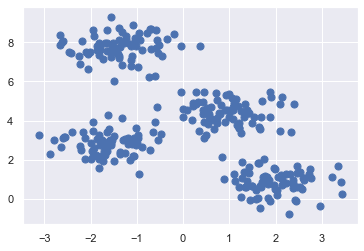

In [17]:
X,Y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6,random_state = 0)
plt.scatter(X[:,0],X[:,1],s=50)

In [18]:
#modelling for kmeans 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans


array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

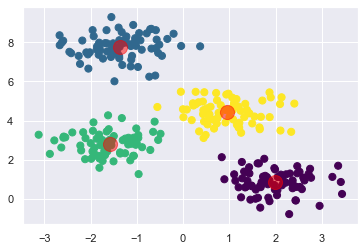

In [20]:
#implementing the trained model
from sklearn.metrics import pairwise_distances_argmin

def find_cluster(X,n_clusters, rseed=2):
    #randomly choosing clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #lets assign the labels based on the closest centers
        labels = pairwise_distances_argmin(X,centers)
        
        #find the new centres from the mean of the points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        #check for convergence
        if(np.all(centers == new_centers)):
            break
            
            
        centers = new_centers
    return(centers,labels)

centers, labels = find_cluster(X,4)
plt.scatter(X[:,0],X[:,1],c = y_kmeans,s = 50, cmap = 'viridis')

#plotting he centers
plt.scatter(centers[:,0],centers[:,1],c = 'red',s = 200, alpha = 0.5)
